In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import string
import nltk

df = pd.read_csv(r"C:\Users\reece\OneDrive\Documents\GitHub\noname\DSP-Final-Project\dataset.csv")

In [194]:
df.isnull().sum()
# df = df.fillna(0)
df = df.dropna(axis=1, how='all')
df = df.interpolate()

In [195]:
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('/', '_')
print(df.columns)
print(len(df.columns))

Index(['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height', 'icu_admit_source',
       'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_

In [196]:
# df.drop(['Unnamed:83'],  axis=1, inplace=True)
df.drop(['apache_4a_hospital_death_prob'],axis=1,inplace=True)
df.drop(['apache_4a_icu_death_prob'],axis=1,inplace=True)
df = df.drop(['encounter_id','patient_id','hospital_id','icu_id'],axis=1)

## Data Analysis

In [197]:
# one hot encode the categorical variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

dummies = pd.get_dummies(df[['icu_admit_source', 'ethnicity', 'gender', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem', 'icu_stay_type']])
# concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, dummies], axis=1)
# drop the original categorical columns
df.drop(['icu_admit_source', 'ethnicity', 'gender', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem', 'icu_stay_type'], axis=1, inplace=True)
print(df.columns)

Index(['age', 'bmi', 'elective_surgery', 'height', 'pre_icu_los_days',
       'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis',
       'apache_post_operative', 'arf_apache',
       ...
       'apache_2_bodysystem_Metabolic', 'apache_2_bodysystem_Neurologic',
       'apache_2_bodysystem_Renal/Genitourinary',
       'apache_2_bodysystem_Respiratory', 'apache_2_bodysystem_Trauma',
       'apache_2_bodysystem_Undefined Diagnoses',
       'apache_2_bodysystem_Undefined diagnoses', 'icu_stay_type_admit',
       'icu_stay_type_readmit', 'icu_stay_type_transfer'],
      dtype='object', length=116)


### Univariate Data Analysis

In [69]:
df.head()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses,icu_stay_type_admit,icu_stay_type_readmit,icu_stay_type_transfer
0,68.0,22.73,0,180.3,0.541667,73.90,113.0,502.01,0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,77.0,27.42,0,160.0,0.927778,70.20,108.0,203.01,0,0.0,...,0,0,0,1,0,0,0,1,0,0
2,25.0,31.95,0,172.7,0.000694,95.30,122.0,703.03,0,0.0,...,1,0,0,0,0,0,0,1,0,0
3,81.0,22.64,1,165.1,0.000694,61.70,203.0,1206.03,1,0.0,...,0,0,0,0,0,0,0,1,0,0
4,19.0,25.10,0,188.0,0.073611,80.85,119.0,601.01,0,0.0,...,0,0,0,0,1,0,0,1,0,0


In [146]:
for feature in df.columns:
    print("Mean of " + feature + " is ", df[feature].mean())
    print("Median of " + feature + " is ", df[feature].median())
    print("Standard Deviation of " + feature + " is ", df[feature].std())
    print()

Mean of age is  62.320265393128565
Median of age is  65.0
Standard Deviation of age is  16.586352893173345

Mean of bmi is  29.203085586226106
Median of bmi is  27.7102595
Standard Deviation of bmi is  8.203153622500682

Mean of elective_surgery is  0.18373622060122338
Median of elective_surgery is  0.0
Standard Deviation of elective_surgery is  0.3872710383527484

Mean of height is  169.6398803332134
Median of height is  170.1
Standard Deviation of height is  10.75528220401083

Mean of pre_icu_los_days is  0.835766050667986
Median of pre_icu_los_days is  0.138888889
Standard Deviation of pre_icu_los_days is  2.4877561731500593

Mean of weight is  84.07991266232705
Median of weight is  80.5
Standard Deviation of weight is  24.848477795360395

Mean of apache_2_diagnosis is  185.38303184935614
Median of apache_2_diagnosis is  123.0
Standard Deviation of apache_2_diagnosis is  85.66419809786872

Mean of apache_3j_diagnosis is  558.0612432261512
Median of apache_3j_diagnosis is  409.02
Sta

In [71]:
# will directly analyze the values of a specific feature
# print(df.iloc[0].value_counts())

In [147]:
for feature in df:
    feat_name = feature.replace('/', '_')
    df.boxplot([feature])
    # plt.ylim(df[feature].min(), df[feature].max())
    plt.savefig("output/feature_boxplots/"+feat_name+".png")
    plt.figure()

C:\Users\reece\AppData\Local\Temp\ipykernel_24056\437308554.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


In [148]:
for feature in df:
    feat_name = feature.replace('/', '_')
    df.hist(column=feature, grid=False, edgecolor='black')
    plt.savefig("output\\feature_histograms\\"+feat_name+".png")

In [ ]:
# # univariate data analysis

# import pandas as pd
# import seaborn as sns

# # perform univariate analysis
# # summary statistics
# print(df.describe())

# # histogram
# df.hist()

# # kernel density plot
# df.plot(kind='density')

# # box plot
# df.plot(kind='box')

### Bivariate Data Analysis

In [ ]:
df.head()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses,icu_stay_type_admit,icu_stay_type_readmit,icu_stay_type_transfer
0,68.0,22.73,0,180.3,0.541667,73.90,113.0,502.01,0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,77.0,27.42,0,160.0,0.927778,70.20,108.0,203.01,0,0.0,...,0,0,0,1,0,0,0,1,0,0
2,25.0,31.95,0,172.7,0.000694,95.30,122.0,703.03,0,0.0,...,1,0,0,0,0,0,0,1,0,0
3,81.0,22.64,1,165.1,0.000694,61.70,203.0,1206.03,1,0.0,...,0,0,0,0,0,0,0,1,0,0
4,19.0,25.10,0,188.0,0.073611,80.85,119.0,601.01,0,0.0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
# df['bmi'].value_counts()
# df1 = df['bmi'].unique()
# dict = {}
# # death_per_feat = df['age']==1
# # df1 = df[death_per_feat]
# # df1
# for val in df1:
#     death_per_feat = df['bmi']==val
#     death_per_feat = df[death_per_feat]
#     num_death = sum(death_per_feat['hospital_death'])
#     dict[val] = num_death
# bmi = pd.DataFrame()
# bmi['bmi'] = dict.keys()
# bmi['num_deaths'] = dict.values()
# plt.figure()
# plt.scatter(x=bmi['bmi'],y=bmi['num_deaths'])
# plt.xlabel('bmi')
# plt.ylabel('num_death')
# plt.title('bmi against death')
# plt.show()


In [ ]:
# saving scatter plots of data against death

for feature in df.columns:
    # if feature == 'hospital_death':
    #     continue
    feat_name = feature.replace('/', '_')
    df1 = df[feature].unique()
    feature_dict = {}
    # death_per_feat = df['age']==1
    # df1 = df[death_per_feat]
    # df1
    for val in df1:
        death_per_feat = df[feature]==val
        death_per_feat = df[death_per_feat]
        num_death = sum(death_per_feat['hospital_death'])
        feature_dict[val] = num_death
    feat = pd.DataFrame()
    feat[feature] = feature_dict.keys()
    feat['num_deaths'] = feature_dict.values()
    plt.figure()
    plt.scatter(x=feat[feature],y=feat['num_deaths'])
    plt.xlabel(feature)
    plt.ylabel('num_death')
    plt.title(feature + ' against death')
    plt.savefig("output/feature_scatterplots/"+feat_name+".png")
    

In [ ]:
df.corr().to_csv(r"C:\Users\reece\OneDrive\Documents\GitHub\noname\DSP-Final-Project\output\correlation_matrix.csv")

In [ ]:
# plt.figure(figsize=(20,20))
# sns.heatmap(df.corr(), annot=True, fmt='.0%')
# plt.show()

In [ ]:
# # correlation and feature removal

# import pandas as pd

# # Find correlation matrix
# corr_matrix = df.corr().abs()
# # Set threshold for correlation coefficient
# threshold = 0.85

# # copy df into dropped_df
# dropped_df = df.copy()
# # Find features with correlation greater than threshold
# high_corr_features = set()
# for i in range(len(corr_matrix.columns)):
#     for j in range(i):
#         if corr_matrix.iloc[i, j] >= threshold:
#             colname_i = corr_matrix.columns[i]
#             colname_j = corr_matrix.columns[j]
#             if colname_i not in high_corr_features:
#                 high_corr_features.add(colname_j)

# # Remove highly correlated features from DataFrame
# dropped_df.drop(high_corr_features, axis=1, inplace=True)
# print(len(dropped_df.columns))

In [ ]:
# # removing outliers using z-score
# import pandas as pd
# from scipy.stats import zscore

# # Calculate z-scores for each feature
# z_scores = df.apply(zscore)

# # # Identify outliers by setting a threshold for z-score
# threshold = 3
# outliers = (z_scores > threshold).any(axis=1)

# # # Remove outliers from DataFrame
# df_outliers_removed = df[~outliers]
# print(df_outliers_removed.shape)

(17323, 116)


## Data Preprocessing

In [198]:
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([(df.columns, StandardScaler())])
scaled_features = mapper.fit_transform(df.copy(), 4)
scaledf = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
# scaler = StandardScaler()
# scaled = scaler.fit(df)
# scaled = scaler.transform(df)

In [118]:
scaledf.head()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses,icu_stay_type_admit,icu_stay_type_readmit,icu_stay_type_transfer
0,0.342436,-0.789102,-0.474441,0.991157,-0.118219,-0.409682,-0.844967,-0.121354,-0.501727,-0.170014,...,-0.301667,-0.386058,-0.166018,-0.380689,-0.209101,-0.061538,-0.20699,0.25331,-0.078381,-0.239365
1,0.885054,-0.217367,-0.474441,-0.896298,0.036986,-0.558585,-0.903335,-0.768705,-0.501727,-0.170014,...,-0.301667,-0.386058,-0.166018,2.626816,-0.209101,-0.061538,-0.20699,0.25331,-0.078381,-0.239365
2,-2.250071,0.334863,-0.474441,0.284524,-0.335674,0.451543,-0.739905,0.313865,-0.501727,-0.170014,...,3.314910,-0.386058,-0.166018,-0.380689,-0.209101,-0.061538,-0.20699,0.25331,-0.078381,-0.239365
3,1.126217,-0.800073,2.107744,-0.422109,-0.335674,-0.900660,0.205653,1.402886,1.993116,-0.170014,...,-0.301667,-0.386058,-0.166018,-0.380689,-0.209101,-0.061538,-0.20699,0.25331,-0.078381,-0.239365
4,-2.611816,-0.500187,-0.474441,1.707089,-0.306364,-0.129985,-0.774926,0.092986,-0.501727,-0.170014,...,-0.301667,-0.386058,-0.166018,-0.380689,4.782380,-0.061538,-0.20699,0.25331,-0.078381,-0.239365


In [199]:
from sklearn.preprocessing import MinMaxScaler

mapper = DataFrameMapper([(df.columns, MinMaxScaler())])
normal_features = mapper.fit_transform(df.copy(), 4)
normaldf = pd.DataFrame(normal_features, index=df.index, columns=df.columns)

In [120]:
normaldf.head()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses,icu_stay_type_admit,icu_stay_type_readmit,icu_stay_type_transfer
0,0.712329,0.148859,0.0,0.738140,0.138498,0.239484,0.057971,0.228074,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.835616,0.237400,0.0,0.390478,0.140596,0.214383,0.033816,0.092229,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.123288,0.322920,0.0,0.607981,0.135558,0.384668,0.101449,0.319404,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.890411,0.147160,1.0,0.477822,0.135558,0.156716,0.492754,0.547932,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.041096,0.193601,0.0,0.870012,0.135955,0.286635,0.086957,0.273053,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [83]:
# for feature in scaled.columns:
#     print("Mean of " + feature + " is ", scaled[feature].mean())
#     print("Median of " + feature + " is ", scaled[feature].median())
#     print("Standard Deviation of " + feature + " is ", scaled[feature].std())
#     print()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [204]:
scaledy = scaledf.pop('hospital_death')
normaly = normaldf.pop('hospital_death')
X_trains, X_tests, y_trains, y_tests = train_test_split(scaledf,y, test_size=0.2, random_state=42)
X_trainn, X_testn, y_trainn, y_testn = train_test_split(normaldf,y, test_size=0.2, random_state=42)

In [202]:
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# set the target variable column name
target_col = 'hospital_death'

# split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
y = df.pop('hospital_death')
X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.2, random_state=42)

# initialize the list of selected features
selected_features = []

# create a copy of the training set to keep track of the remaining features
remaining_features = train_df.columns.drop(target_col)

# iterate over the remaining features and select the one that has the highest F-value
while len(remaining_features) > 0:
    f_values, p_values = f_classif(train_df[remaining_features], train_df[target_col])
    best_feature_index = np.argmax(f_values)
    best_feature = remaining_features[best_feature_index]
    
    # add the best feature to the list of selected features and remove it from the remaining features
    selected_features.append(best_feature)
    remaining_features = remaining_features.drop(best_feature)
    
    # print the selected feature and its corresponding F-value
    # print('Selected feature:', best_feature, 'with F-value:', f_values[best_feature_index])

# create a new DataFrame with the selected features
forward_selected_df = train_df[selected_features + [target_col]]

# display the selected features
print('Selected features:', selected_features)

Selected features: ['gcs_motor_apache', 'gcs_eyes_apache', 'gcs_verbal_apache', 'ventilated_apache', 'd1_sysbp_min', 'd1_sysbp_noninvasive_min', 'd1_spo2_min', 'd1_temp_min', 'd1_mbp_min', 'd1_mbp_noninvasive_min', 'd1_diasbp_min', 'd1_diasbp_noninvasive_min', 'intubated_apache', 'd1_heartrate_max', 'temp_apache', 'h1_sysbp_min', 'h1_sysbp_noninvasive_min', 'h1_mbp_noninvasive_min', 'h1_mbp_min', 'h1_diasbp_noninvasive_min', 'h1_resprate_max', 'h1_diasbp_min', 'h1_heartrate_max', 'heart_rate_apache', 'h1_resprate_min', 'age', 'd1_resprate_max', 'd1_potassium_max', 'apache_3j_bodysystem_Sepsis', 'h1_spo2_min', 'elective_surgery', 'apache_3j_diagnosis', 'apache_2_diagnosis', 'icu_admit_source_Operating Room / Recovery', 'h1_heartrate_min', 'apache_post_operative', 'resprate_apache', 'icu_admit_source_Floor', 'd1_glucose_max', 'apache_3j_bodysystem_Metabolic', 'apache_2_bodysystem_Metabolic', 'apache_2_bodysystem_Cardiovascular', 'pre_icu_los_days', 'h1_sysbp_max', 'h1_sysbp_noninvasive_m

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Create a sample dataset with 4 features and 100 samples
X = np.random.rand(100, 4)

# Instantiate a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the PCA model to the data
pca.fit(X)

# Transform the data to the new coordinate system
X_transformed = pca.transform(X)

# Print the explained variance ratio of each principal component
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Print the transformed data
print("Transformed data:", X_transformed)

## Evaluation

In [186]:
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay, roc_curve, auc, precision_recall_curve
from sklearn.calibration import calibration_curve, CalibrationDisplay

def evaluate(probs, true, model_name):
    # print(probs)
    preds = np.round(probs)
    # log loss
    print("The log loss found for "+ model_name + " is ", log_loss(true, probs))
    # accuracy
    print("The accuracy found for "+ model_name + " is ", accuracy_score(true, preds))
    # roc_auc_score
    print("The ROC AUC found for "+ model_name + " is ", roc_auc_score(true, probs))
    # calibration curve plot
    plt.figure()
    prob_true, prob_pred = calibration_curve(y_test, probs)
    disp = CalibrationDisplay(prob_true, prob_pred, probs)
    disp.plot()
    plt.figure()
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(true, preds))
    disp.plot()
    plt.show()
    plt.figure()
    precision, recall, _ = precision_recall_curve(true, preds)
    disp = PrecisionRecallDisplay(precision=precision, recall=recall)
    disp.plot()
    disp.plot()
    plt.show()
    plt.figure()
    fpr, tpr, thresholds = roc_curve(true, probs)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                       estimator_name='example estimator')
    display.plot()
    plt.show()
    

# Modeling

- Random forest
- XGBoost
- Catboost 
- Decision Trees
- Stacking 

## Random Forests

In [205]:
for col in X_trains.columns:
    print(col)

age
bmi
elective_surgery
height
pre_icu_los_days
weight
apache_2_diagnosis
apache_3j_diagnosis
apache_post_operative
arf_apache
gcs_eyes_apache
gcs_motor_apache
gcs_unable_apache
gcs_verbal_apache
heart_rate_apache
intubated_apache
map_apache
resprate_apache
temp_apache
ventilated_apache
d1_diasbp_max
d1_diasbp_min
d1_diasbp_noninvasive_max
d1_diasbp_noninvasive_min
d1_heartrate_max
d1_heartrate_min
d1_mbp_max
d1_mbp_min
d1_mbp_noninvasive_max
d1_mbp_noninvasive_min
d1_resprate_max
d1_resprate_min
d1_spo2_max
d1_spo2_min
d1_sysbp_max
d1_sysbp_min
d1_sysbp_noninvasive_max
d1_sysbp_noninvasive_min
d1_temp_max
d1_temp_min
h1_diasbp_max
h1_diasbp_min
h1_diasbp_noninvasive_max
h1_diasbp_noninvasive_min
h1_heartrate_max
h1_heartrate_min
h1_mbp_max
h1_mbp_min
h1_mbp_noninvasive_max
h1_mbp_noninvasive_min
h1_resprate_max
h1_resprate_min
h1_spo2_max
h1_spo2_min
h1_sysbp_max
h1_sysbp_min
h1_sysbp_noninvasive_max
h1_sysbp_noninvasive_min
d1_glucose_max
d1_glucose_min
d1_potassium_max
d1_potassium

The log loss found for Random Forest is  0.23840730888593542
The accuracy found for Random Forest is  0.9249304911955515
The ROC AUC found for Random Forest is  0.8621230281306563


<Figure size 640x480 with 0 Axes>

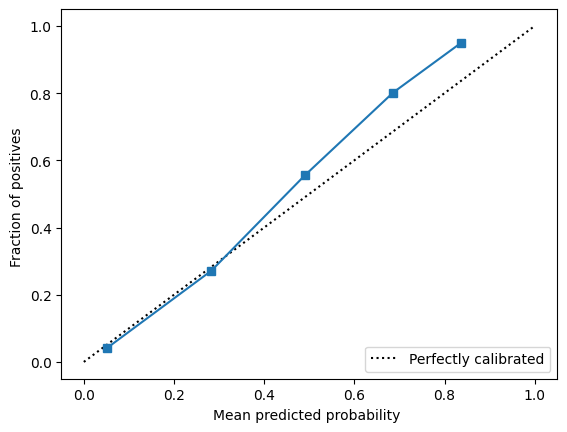

<Figure size 640x480 with 0 Axes>

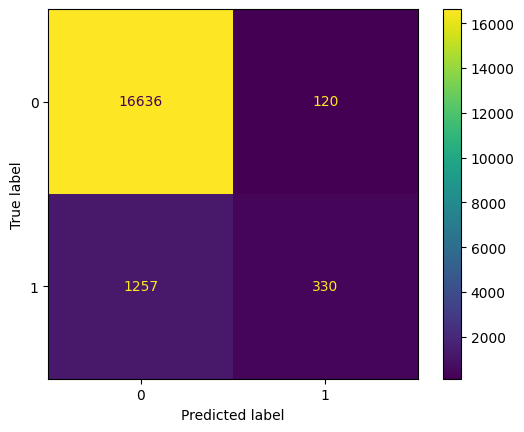

<Figure size 640x480 with 0 Axes>

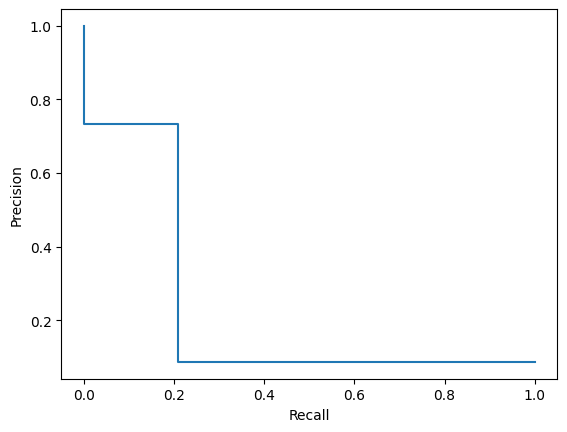

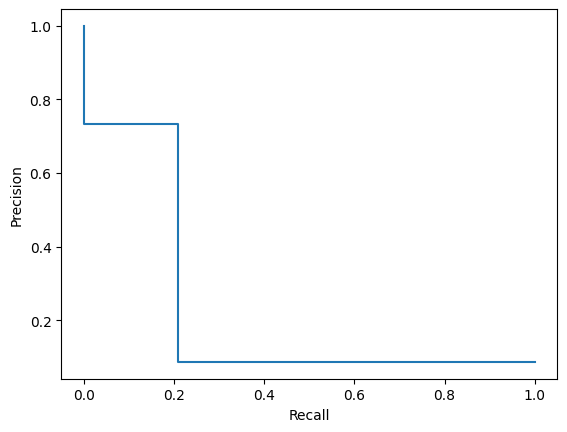

<Figure size 640x480 with 0 Axes>

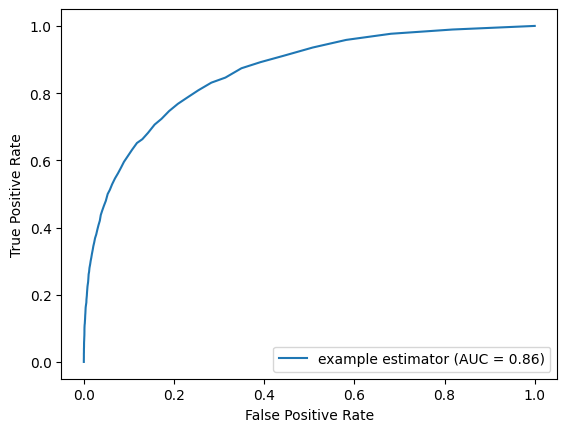

In [206]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_trains, y_trains)

rf_probs = rf.predict_proba(X_tests)
evaluate(rf_probs[:,1], y_tests, "Random Forest")